## 1\. Compreensão do problema

> O Ojetivo do projeto é descobrir quais fatores estão relacionados com a inadinplência e a adimplência dos clientes de uma determinada empresa de cartão de crédito.



## 2\. Exploração dos Dados


> Foi utilizada a base de dados de crédito presentes neste neste [link]('https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/develop/dataset/credito.csv'). 
Os dados estão no formato CSV e contém informações sobre clientes de uma instituição financeira. Em especial, estamos interessados em explicar a segunda coluna, chamada de default, que indica se um cliente é adimplente(default = 0), ou inadimplente (default = 1), ou seja, queremos entender o porque de um cliente deixar de honrar com suas dívidas baseado no comportamento de outros atributos, como salário, escolaridade e movimentação financeira. Uma descrição completa dos atributos está abaixo.



| Coluna  | Descrição |
| ------- | --------- |
| id      | Número da conta |
| default | Indica se o cliente é adimplente (0) ou inadimplente (1) |
| idade   | --- |
| sexo    | --- |
| depedentes | --- |
| escolaridade | --- |
| estado_civil | --- |
| salario_anual | Faixa do salario mensal multiplicado por 12 |
| tipo_cartao | Categoria do cartao: blue, silver, gold e platinium |
| meses_de_relacionamento | Quantidade de meses desde a abertura da conta |
| qtd_produtos | Quantidade de produtos contratados |
| iteracoes_12m | Quantidade de iteracoes com o cliente no último ano |
| meses_inatico_12m | Quantidade de meses que o cliente ficou inativo no último ano |
| limite_credito | Valor do limite do cartão de crédito |
| valor_transacoes_12m | Soma total do valor das transações no cartão de crédito no último ano |
| qtd_transacoes_12m | Quantidade total de transações no cartão de crédito no último ano |

Para iniciar, vamos fazer a leitura dos dados num dataframe pandas, já definindo como identificar os dados faltantes (na):

In [26]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/develop/dataset/credito.csv', na_values='na')

df.head(n=10)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28
5,713061558,0,44,M,2,mestrado,casado,$40K - $60K,blue,36,3,2,1,"4.010,69","1.088,07",24
6,810347208,0,51,M,4,NaN,casado,$120K +,gold,46,6,3,1,"34.516,72","1.330,87",31
7,818906208,0,32,M,0,ensino medio,NaN,$60K - $80K,silver,27,2,2,2,"29.081,49","1.538,32",36
8,710930508,0,37,M,3,sem educacao formal,solteiro,$60K - $80K,blue,36,5,0,2,"22.352,50","1.350,14",24
9,719661558,0,48,M,2,mestrado,solteiro,$80K - $120K,blue,36,6,3,3,"11.656,41","1.441,73",32


### **2.1. Estrutura**

Para começar é interessante ver o quanto a base de dados está balanceda, ou seja, qual é a porporção de dados entre clientes adimplentes e inadimplentes:

In [27]:
qtd_total, _ = df.shape #Qtde de linhas e colunas do dataframe

qtd_adimplentes, _ = df[df['default'] == 0].shape #Qtde de linhas e colunas do dataframe considerando somente os adimplentes

qtd_inadimplentes, _ = df[df['default'] == 1].shape#Qtde de linhas e colunas do dataframe considerando somente os inadimplentes

print(f"A proporcão clientes adimplentes é de {round(100 * qtd_adimplentes / qtd_total, 2)}%")
print(f"A proporcão clientes inadimplentes é de {round(100 * qtd_inadimplentes / qtd_total, 2)}%")

A proporcão clientes adimplentes é de 83.93%
A proporcão clientes inadimplentes é de 16.07%


Com base nos valores de proporção apresentados acima, pode-se concluir que a base de dados é composta por mais dados referentes a clientes adimplentes do que inadimplentes.

### **2.2. Schema**

In [28]:
df.head(n=5) #visualização das primeiras 5 linhas do df

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28


In [29]:
df.dtypes #Qual o tipo de dado de cada coluna do df?

id                          int64
default                     int64
idade                       int64
sexo                       object
dependentes                 int64
escolaridade               object
estado_civil               object
salario_anual              object
tipo_cartao                object
meses_de_relacionamento     int64
qtd_produtos                int64
iteracoes_12m               int64
meses_inativo_12m           int64
limite_credito             object
valor_transacoes_12m       object
qtd_transacoes_12m          int64
dtype: object

Importante pontuar que os atributos **limite_credito** e **valor_transacoes_12m** estão definidas com type objetc, no entanto não faz sentido, uma vez que são números decimais, ou seja, na etapa de limpeza de dados é preciso converter esses atributos para float.

Aplicando uma visualização rápidas aos atributos categóricos:

In [30]:
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436
limite_credito,10127,9272,"1.438,21",11
valor_transacoes_12m,10127,10035,"3.851,51",3


Aqui nota-se que para os atributos **escolaridade**, **estado_civil** e **salario_anual** a quantidade é inferior a 10127, ou seja, há dados faltantes para esses atributos, que deverão ser tratados.

Outro aspecto interessante que corrobora para análise anterior é com relação aos atributos **'limite_credito'** e **'valor_transacoes_12m'**: a quantidade de valores únicos é muito perto da quantidade total de elementos, ou seja, a análise para atributos categóricos não é adequada para esses atributos pois eles estão no grupo incorreto.

Aplicando uma visualização rápidas aos atributos numéricos::

In [31]:
df.drop('id', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.0,0.0,0.0,0.0,1.0
idade,10127.0,46.325960,8.016814,26.0,41.0,46.0,52.0,73.0
dependentes,10127.0,2.346203,1.298908,0.0,1.0,2.0,3.0,5.0
meses_de_relacionamento,10127.0,35.928409,7.986416,13.0,31.0,36.0,40.0,56.0
qtd_produtos,10127.0,3.812580,1.554408,1.0,3.0,4.0,5.0,6.0
iteracoes_12m,10127.0,2.455317,1.106225,0.0,2.0,2.0,3.0,6.0
meses_inativo_12m,10127.0,2.341167,1.010622,0.0,2.0,2.0,3.0,6.0
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.0,45.0,67.0,81.0,139.0


A visualização acima nos mostra que não há dados faltantes para nenhum atributo numérico e que o atributo **qtd_transacoes_12m** possui um desvio elevado, ou seja, os dados estão bem dispersos.

### **2.3. Dados Faltantes**

Como já foi definido de que forma os dados faltantes estão especificados (na), o próximo passo é identificar em quais colunas esses dados estão, apesar de já termos uma desconfiança baseada nas análises acima: **escolaridade**, **estado_civil** e **salario_anual**

In [32]:
df.isna().any()

id                         False
default                    False
idade                      False
sexo                       False
dependentes                False
escolaridade                True
estado_civil                True
salario_anual               True
tipo_cartao                False
meses_de_relacionamento    False
qtd_produtos               False
iteracoes_12m              False
meses_inativo_12m          False
limite_credito             False
valor_transacoes_12m       False
qtd_transacoes_12m         False
dtype: bool


- A função abaixo levanta algumas estatísticas sobre as colunas dos dados faltantes.

In [33]:
def stats_dados_faltantes(df: pd.DataFrame) -> None:

  stats_dados_faltantes = []
  for col in df.columns:
    if df[col].isna().any():
      qtd, _ = df[df[col].isna()].shape
      total, _ = df.shape
      dict_dados_faltantes = {col: {'quantidade': qtd, "porcentagem": round(100 * qtd/total, 2)}}
      stats_dados_faltantes.append(dict_dados_faltantes)

  for stat in stats_dados_faltantes:
    print(stat)

O objetivo aqui é verificar se os dados faltantes alteram a proporção da quantidade de dados so três atributos: **escolaridade**, **estado_civil** e **salario_anual**.

In [34]:
stats_dados_faltantes(df=df)

{'escolaridade': {'quantidade': 1519, 'porcentagem': 15.0}}
{'estado_civil': {'quantidade': 749, 'porcentagem': 7.4}}
{'salario_anual': {'quantidade': 1112, 'porcentagem': 10.98}}


In [35]:
stats_dados_faltantes(df=df[df['default'] == 0])

{'escolaridade': {'quantidade': 1263, 'porcentagem': 14.86}}
{'estado_civil': {'quantidade': 620, 'porcentagem': 7.29}}
{'salario_anual': {'quantidade': 925, 'porcentagem': 10.88}}


In [36]:
stats_dados_faltantes(df=df[df['default'] == 1])

{'escolaridade': {'quantidade': 256, 'porcentagem': 15.73}}
{'estado_civil': {'quantidade': 129, 'porcentagem': 7.93}}
{'salario_anual': {'quantidade': 187, 'porcentagem': 11.49}}


Pode-se notar que a proporção de dados faltantes praticamente se mantém para os três atributos nos três data frames analisados (df base completa original, df de adimplentes e df de inadimplentes). Ou seja, podemos eliminar as linhas com dados faltantes sem que coloquemos um viés na análise dos dados.

## 3\. Transformação e Limpeza dos dados

### **3.1. Correção de Schema**

Na etapa de exploração, notamos que as colunas **limite_credito** e **valor_transacoes_12m** estavam sendo interpretadas como colunas categóricas (`dtype = object`). Dessa forma, nesse ponto vamos utilizar uuma função `lambda` para fazer essa correção.

In [37]:
df['valor_transacoes_12m'] = df['valor_transacoes_12m'].apply(lambda valor: float(valor.replace(".", "").replace(",", ".")))
df['limite_credito'] = df['limite_credito'].apply(lambda valor: float(valor.replace(".", "").replace(",", ".")))

Checando o schema para verificar que a função `lamba` funcionou corretamente:

In [38]:
df.dtypes

id                           int64
default                      int64
idade                        int64
sexo                        object
dependentes                  int64
escolaridade                object
estado_civil                object
salario_anual               object
tipo_cartao                 object
meses_de_relacionamento      int64
qtd_produtos                 int64
iteracoes_12m                int64
meses_inativo_12m            int64
limite_credito             float64
valor_transacoes_12m       float64
qtd_transacoes_12m           int64
dtype: object

Vamos dar um olhada nos atributos numéricos para termos uma ideia de como os atributos **limite_credito** e **valor_transacoes_12m** se comportam.

In [39]:
df.drop('id', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.00,0.000,0.00,0.000,1.00
idade,10127.0,46.325960,8.016814,26.00,41.000,46.00,52.000,73.00
dependentes,10127.0,2.346203,1.298908,0.00,1.000,2.00,3.000,5.00
meses_de_relacionamento,10127.0,35.928409,7.986416,13.00,31.000,36.00,40.000,56.00
qtd_produtos,10127.0,3.812580,1.554408,1.00,3.000,4.00,5.000,6.00
iteracoes_12m,10127.0,2.455317,1.106225,0.00,2.000,2.00,3.000,6.00
meses_inativo_12m,10127.0,2.341167,1.010622,0.00,2.000,2.00,3.000,6.00
limite_credito,10127.0,8632.440165,9088.788041,1438.00,2555.355,4549.42,11068.175,34516.99
valor_transacoes_12m,10127.0,4404.583047,3397.128078,510.16,2155.825,3899.59,4741.310,18484.93
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.00,45.000,67.00,81.000,139.00


Podemos observar que os atributos **limite_credito** e **valor_transacoes_12m** possuem um valor de desvio padrão elevado, ou seja, há uma dispersão grande dos valores, o que nos leva pensar que são atributos bem personalizados por cliente.

### **3.2. Remoção de dados faltantes** 

In [40]:
df.dropna(inplace=True)

Analisando novamente a estrutura de dados após remover os itens faltantes:

In [41]:
qtd_total_novo, _ = df.shape
qtd_adimplentes_novo, _ = df[df['default'] == 0].shape
qtd_inadimplentes_novo, _ = df[df['default'] == 1].shape

print(f"A proporcão adimplentes ativos é de {round(100 * qtd_adimplentes / qtd_total, 2)}%")
print(f"A nova proporcão de clientes adimplentes é de {round(100 * qtd_adimplentes_novo / qtd_total_novo, 2)}%")
print("")
print(f"A proporcão clientes inadimplentes é de {round(100 * qtd_inadimplentes / qtd_total, 2)}%")
print(f"A nova proporcão de clientes inadimplentes é de {round(100 * qtd_inadimplentes_novo / qtd_total_novo, 2)}%")

A proporcão adimplentes ativos é de 83.93%
A nova proporcão de clientes adimplentes é de 84.28%

A proporcão clientes inadimplentes é de 16.07%
A nova proporcão de clientes inadimplentes é de 15.72%


Como era de se esperar, as proporcões de clientes adimplentes e iandimplentes após a remoção dos dados faltantes ficou praticamente a mesma. Dessa forma as etapas de exploração e limpeza dos dados foi conluída com sucesso, podendo passar assim, para a etapa de visualização dos dados.

## 4\. Visualização de dados

Nesse ponto vamos criar diversas visualizações comparativas para podemos gerar insights que ajudem a responder ao nosso objetivo: quais atributos estão relacionados com a adimplencia e quais estão relacionados com a inadimplencia dos clientes.

Começamos inportando pacotes de visualização e separando os clientes adimplentes e enadimplentes.

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

df_adimplente = df[df['default'] == 0]
df_inadimplente = df[df['default'] == 1]

### **4.1. Visualizações categóricas** 

 - Analisando o atributo Escolaridade:

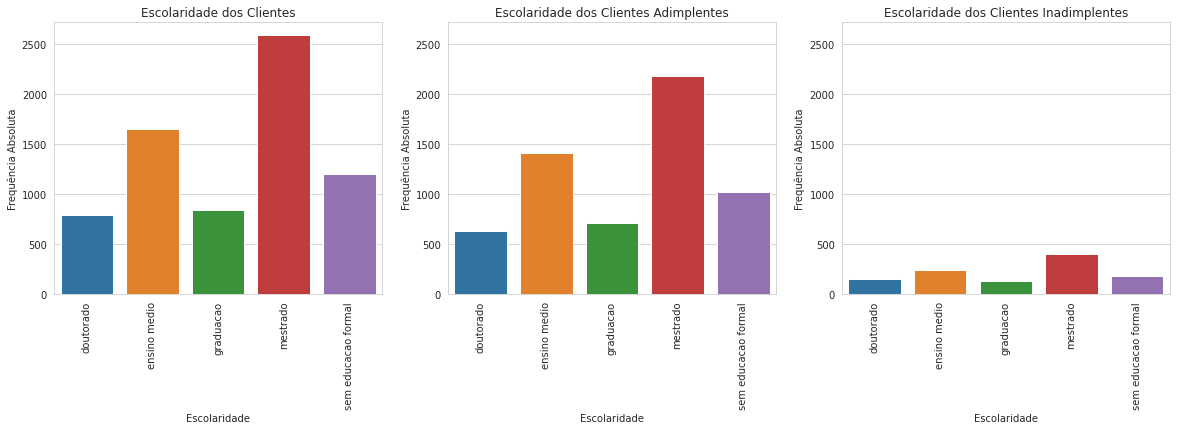

In [43]:
coluna = 'escolaridade'
titulos = ['Escolaridade dos Clientes', 'Escolaridade dos Clientes Adimplentes', 'Escolaridade dos Clientes Inadimplentes']

eixo = 0
max_y = 0
max = df.select_dtypes('object').describe()[coluna]['freq'] * 1.1

figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  df_to_plot = dataframe[coluna].value_counts().to_frame()
  df_to_plot.rename(columns={coluna: 'frequencia_absoluta'}, inplace=True)
  df_to_plot[coluna] = df_to_plot.index
  df_to_plot.sort_values(by=[coluna], inplace=True)
  df_to_plot.sort_values(by=[coluna])

  f = sns.barplot(x=df_to_plot[coluna], y=df_to_plot['frequencia_absoluta'], ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
  f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

Podemos notar que o atributo escolaridade não é relevante para o objetivo do projeto, pois a distribuição se mantém semelhante nos três gráficos.

- Analisando o atributo tipo_cartao:

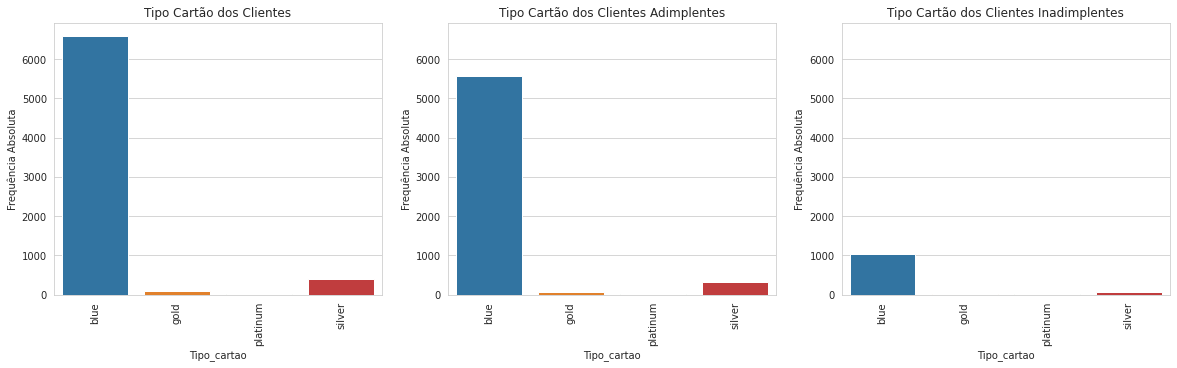

In [44]:
coluna = 'tipo_cartao'
titulos = ['Tipo Cartão dos Clientes', 'Tipo Cartão dos Clientes Adimplentes', 'Tipo Cartão dos Clientes Inadimplentes']

eixo = 0
max_y = 0
max = df.select_dtypes('object').describe()[coluna]['freq'] * 1.1

figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  df_to_plot = dataframe[coluna].value_counts().to_frame()
  df_to_plot.rename(columns={coluna: 'frequencia_absoluta'}, inplace=True)
  df_to_plot[coluna] = df_to_plot.index
  df_to_plot.sort_values(by=[coluna], inplace=True)
  df_to_plot.sort_values(by=[coluna])

  f = sns.barplot(x=df_to_plot[coluna], y=df_to_plot['frequencia_absoluta'], ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
  f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

Para esse atributo podemos verificar algo interessante, apesar de poucos clientes possuírem o cartão gold, todos são adimplentes. Não há clientes com cartão platinum na base de dados. 

### **4.2. Visualizações numéricas** 

- Analisando o atributo Quantidade de Transações nos Últimos 12 Meses:

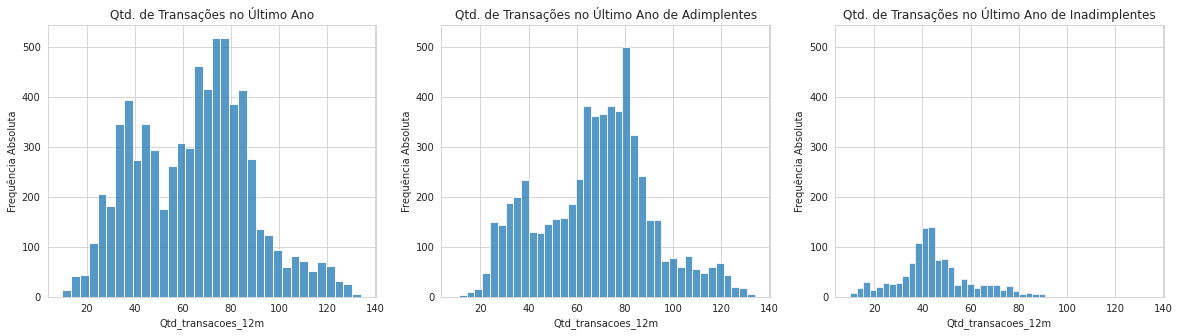

In [45]:
coluna = 'qtd_transacoes_12m'
titulos = ['Qtd. de Transações no Último Ano', 'Qtd. de Transações no Último Ano de Adimplentes', 'Qtd. de Transações no Último Ano de Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

No gráfico que representa todos os clientes, podemos notar dois picos: um em torno de 40 transações e outro em torno de 80 transações. No entanto qdo avaliamos o gráfico de adimplentes, apesar de termos os dois piscos semelhantes, o pico que ocorre em torno de 40 transações parece mais suave. E, ao avaliarmos o gráfico dos inadimplentes vemos um pico em torno de 40 transações, completanto o que falta no gráfico dos clientes adimplentes. Dessa forma podemos concluir que o atributo **qtd_transacoes_12m** tem relação com o obejtivo do projeto.

- Verificando o atributo Valor das transações nos últimos 12 Meses

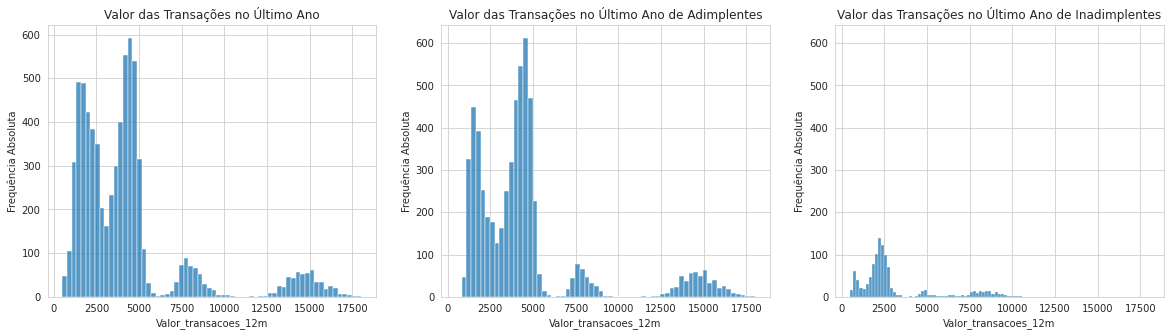

In [46]:
coluna = 'valor_transacoes_12m'
titulos = ['Valor das Transações no Último Ano', 'Valor das Transações no Último Ano de Adimplentes', 'Valor das Transações no Último Ano de Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

Algo semelhante ocorre com o atributo **valor_transacoes_12m** como ocorreu com o atributo **qtd_transacoes_12m**: Em torno de transações com Valor de 2.500 o que falta no gráfico dos clientes adimplentes é complementado pelo que está no gráfico dos clientes inadimplentes.

Uma vez identificado dois atributos numéricos que têm relaçãco com o objetivo do projeto, vamos observar como default se divide ao considerarmos esses dois atributos juntos:

 - Valor de Transações nos Últimos 12 Meses x Quantidade de Transações nos Últimos 12 Meses

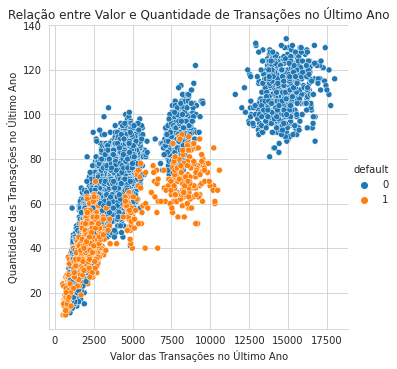

In [47]:
f = sns.relplot(x='valor_transacoes_12m', y='qtd_transacoes_12m', data=df, hue='default')
_ = f.set(
    title='Relação entre Valor e Quantidade de Transações no Último Ano', 
    xlabel='Valor das Transações no Último Ano', 
    ylabel='Quantidade das Transações no Último Ano'
  )

Ao analisarmos o gráfico acima podemos concluir que há dois grupos distintos que contém adimplentes e inadimplentes e um grupo que só contém adimplentes.


Analisando os grupos que contém somente adimplentes podemos conluir que cliente com muitas transações (acima de 80) com valores altos (acima de 12 Mil) tendem a ser adimplentes.

Analisando os grupos que possuem inadimplentes podemos chegar as seguintes combinações entre valor de transação e qte de transação:

1.   Qtde transações até 60 com valores póximos a 3000: tendência a inadimplência.
2.   Qtde transações de 40 até 90 com valores de 3000 até  10000: tendência a inadimplência.
3.   Qtde transações de 60 até 100 com valores de 2500 até  5000: tendência a adimplência.
4.   Qtde transações de 90 até 120 com valores de 7500 até  9000: tendência a adimplência.




 - Analisando o atributo Idade

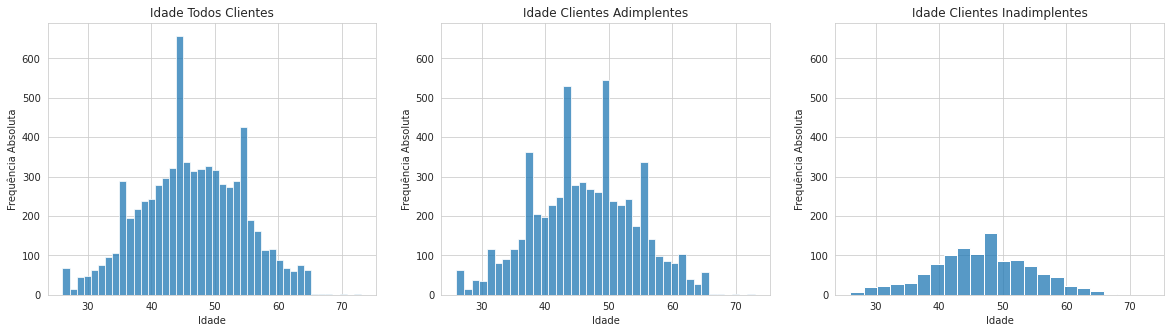

In [48]:
coluna = 'idade'
titulos = ['Idade Todos Clientes', 'Idade Clientes Adimplentes', 'Idade Clientes Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

Analisando o atributo da Idade podemos notar que clientes entre 40 e  50 anos possuem maior tendência a serem inadimplentes.

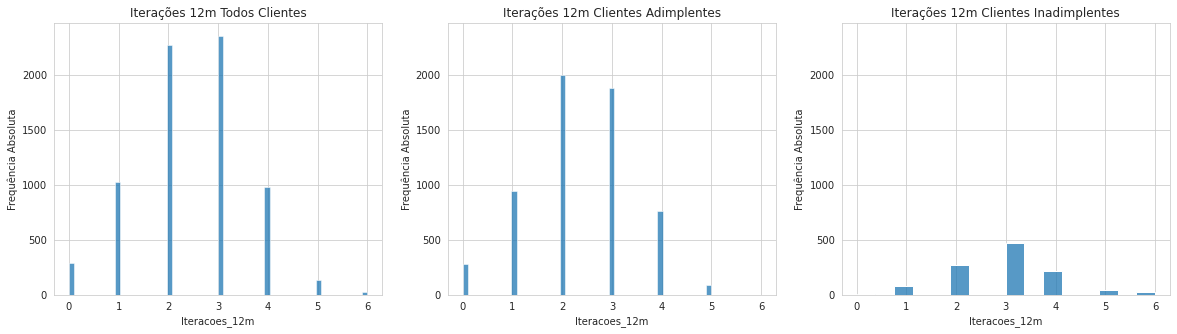

In [49]:
coluna = 'iteracoes_12m'
titulos = ['Iterações 12m Todos Clientes', 'Iterações 12m Clientes Adimplentes', 'Iterações 12m Clientes Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

Ao analisarmos os gráficos acima, podemos verificar que quando não há iteração o cliente tende a ser adinmplente e conforme a qtde de iterações vai aumentando os clientes tedem a se tornar inandimplentes. Vale ressaltar que quando há a mudança de 2 pra 3 iterações é possível que seja um "ponto de virada", ou seja, seria interessante olhar esse cliente mais de perto pois é onde há maior tendência que ele se torne inadimplente.

- Verificando se há relação entre os atirbutos **idade** e **iteracao_12m**:

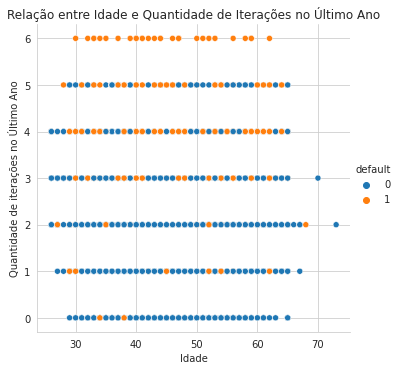

In [50]:
f = sns.relplot(x='idade', y='iteracoes_12m', data=df, hue='default')
_ = f.set(
    title='Relação entre Idade e Quantidade de Iterações no Último Ano', 
    xlabel='Idade', 
    ylabel='Quantidade de iterações no Último Ano'
  )

Ao avaliarmos os adois atributos **idade** e **iteracoes_12m** juntos com a coluna default podemos verificar que independente da idade, conforme maior o número de iterações maior a qte de clientes inandimplentes. Verificamos tb que clientes entre 40 e 50 anos que possuem 4 iterações possuem uma forte tendência a ser inadimplente. 

## 5\. Conclusão

Pode-se concluir que os atributos categóricos não conseguem mapear o comportamento de adimplência e inadimplência dos clientes da base de dados analisada.
No entanto, quando avaliados os atributos numéricos pode-se destacar os seguintes pontos:

- Relação entre **qtd_transacoes_12m** e **valor_transacoes_12m**:

1.   Qtde transações até 60 com valores póximos a 3000: tendência a inadimplência.
2.   Qtde transações de 40 até 90 com valores de 3000 até  10000: tendência a inadimplência.
3.   Qtde transações de 60 até 100 com valores de 2500 até  5000: tendência a adimplência.
4.   Qtde transações de 90 até 120 com valores de 7500 até  9000: tendência a adimplência.
5.   Cliente com muitas transações (acima de 80) com valores altos (acima de 12 Mil) tendem a ser adimplentes.


- Atributo **iteracao_12m**: Vale atencão ao cliente no momento em que a quantidade de iteração muda de de 2 pra 3 pois há indicativo de ser um  "ponto de virada", ou seja, é um indicativo de que que ele possa se tornar inadimplente.


- Atributo **idade** e **iteracao_12m** juntos: Clientes entre 40 e 50 anos que possuem 4 iterações possuem uma forte tendência a ser inadimplente.